<a href="https://colab.research.google.com/github/Ivanpillow/Clasificacion-Inteligente-de-Datos/blob/main/Hands-on%202%3A%20kNN%20Notebook%20(Tutorial)/Hands_on_2_kNN_Notebook_DIHM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hans-On 2 kNN Notebook

Nombre: Diego Iván Hernández Muñoz

Profesor: Jose Antonio Aviña Mendez

Materia: Clasificacion inteligente de datos

# 1.1 Fundamentos sobre la clasificación kNN

Algoritmo conocido como K-Nearest Neighbors o k-vecinos más cercanos, su funcionamiento se traduce de manera que se selecciona un punto dentro de los datos de prueba y clasifica en función de las clases de sus k vecinos más cercanos.

Se describre como un algoritmo no paramétrico, sencillo y efectivo para datos pequeños, donde se trata que patrones similares tienden a pertenecer a la misma clase.

# 1.2 Modelo matemático del kNN

Para obtener los puntos más cerca del punto de consulta determinado, se necesita calcular la distancia entre la consulta y los demás puntos de datos.

Existen varias maneras y formulas para medir las distancias, mostraré las 3 más importantes.

## 1.2.1 Distancia euclidiana (p=2)

Es la más comúnmente empleada y usa dos vectores con solamente valores reales, mediante la fórmula se mide la distancia entre el punto de consulta y el otro a medir.

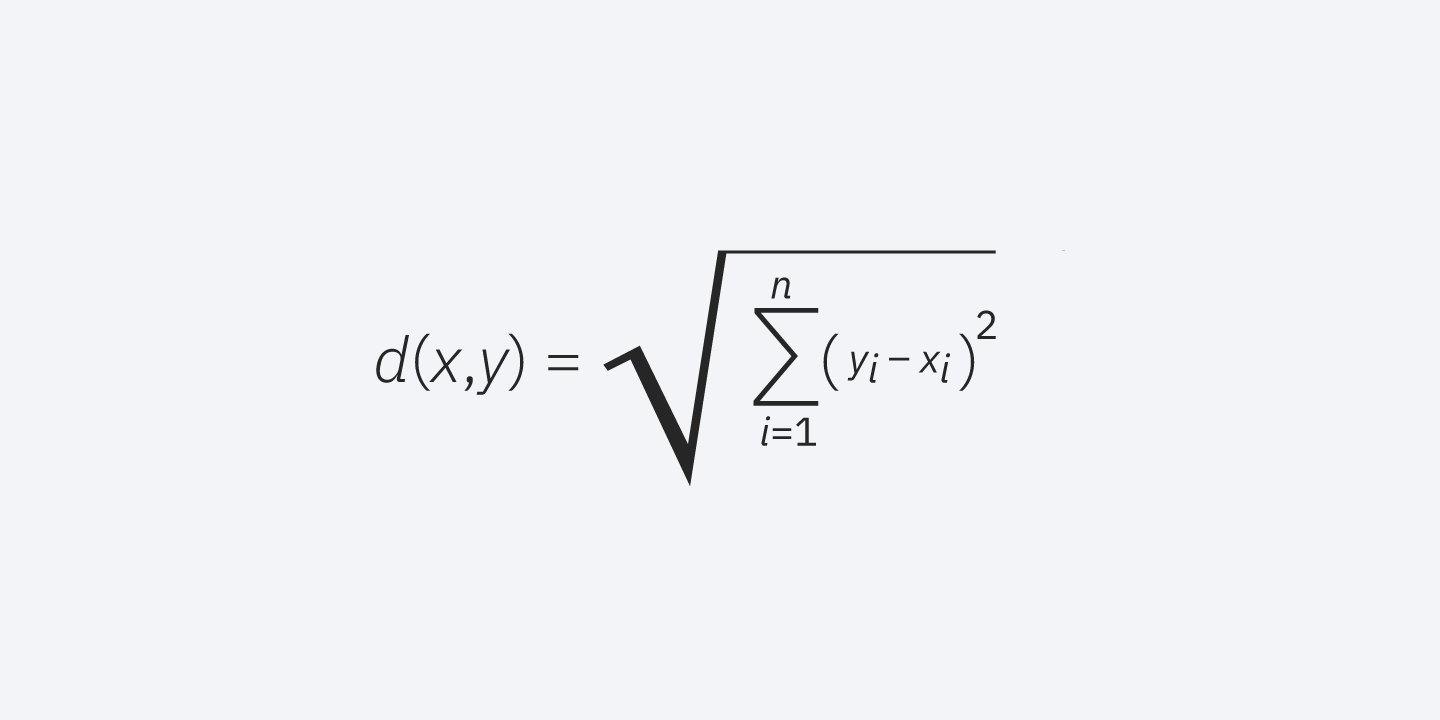

Para simplificar su entendimiento sus valores son los siguientes:

X y Y son los puntos o vectores con coordenadas (pueden ser hasta n), así n es el número de componentes de los vectores.

Se hace la suma de todos los cuadrados de las diferencias en cada dimensión (n) y se obtiene la raíz cuadrada de la suma total.

## 1.2.2 Distancia de Manhattan (p=1)

Con esta fórmula también muy comúnmente utilizada se visualiza con una cuadrícula y se mide el valor absoluto entre dos puntos.

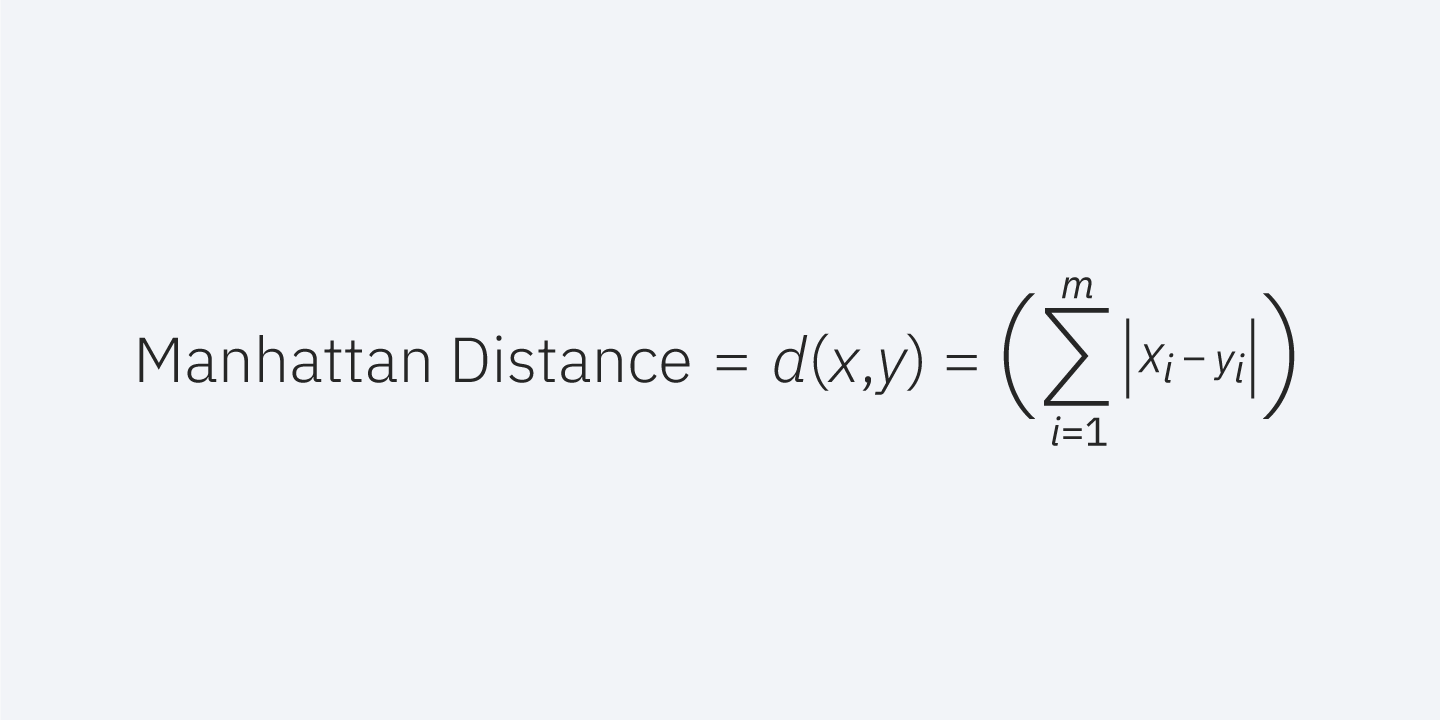

Ahora desglosando la fórmula de distancia de Manhattan se ve así:

**X** siendo el primer punto o vector y **Y** el segundo (pudiendo llegar ambos hasta **m**), así que **m** es el número de dimensiones de los vectores.

A diferencia de la ecludiana ahora se obtienen los valroes absolutos, así que con esta operación se obtiene **la suma de las diferencias absolutas en todas las dimensione**.

## 1.2.3 Distancia de Minkowski

Esta tercera es la forma generalizada de las métricas de distancia euclidiana y Manhattan. Donde el parámetro, p, en la fórmula permite la creación de otras métricas de distancia.

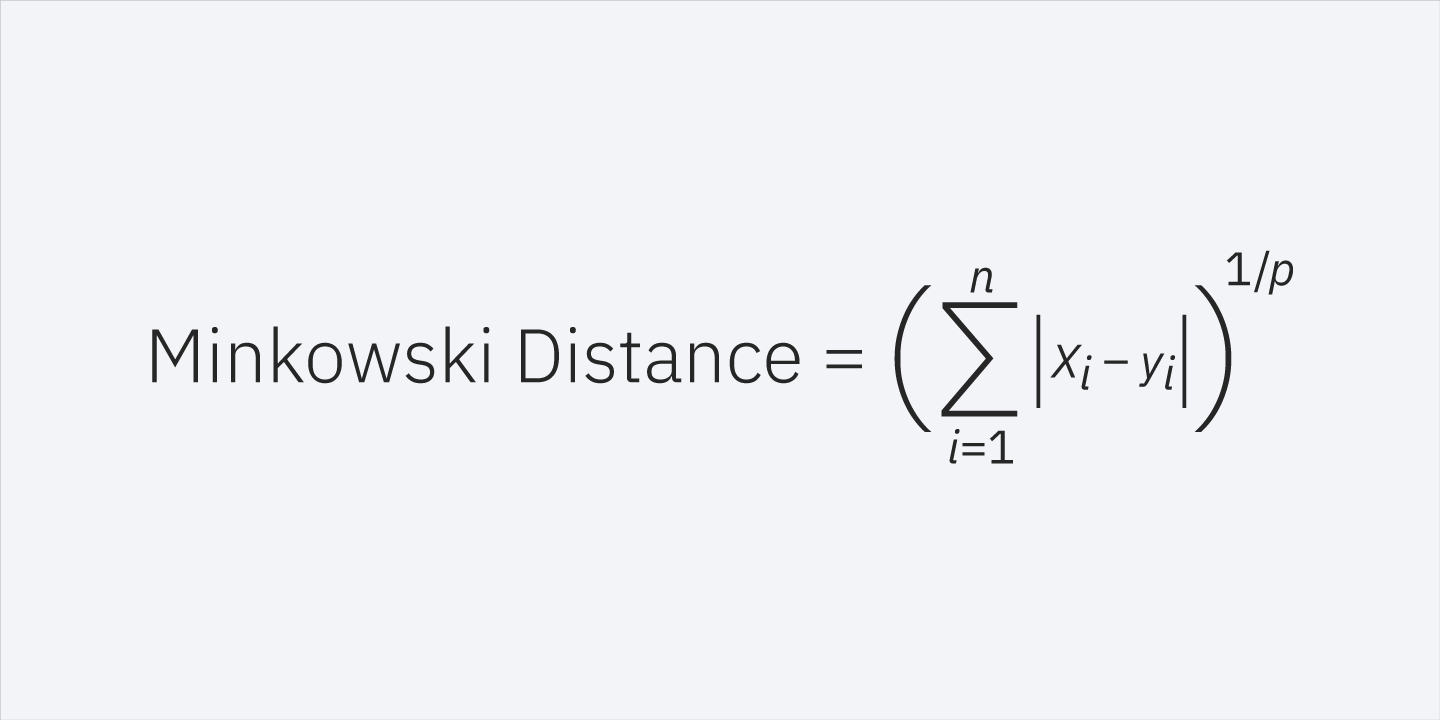

Tal como en las anteriores para la distancia de Minkowski los valores de **X**, **Y**, **n** e **i** significan lo mismo.

Dentro de la fórmula la P que se observa es un parámetro que define el tipo de distancia o norma.

Lo que se obtiene con esta operación es **la suma de todas las diferencias elevadas a la potencia P**. Para después sacar la raíz correspondiente al valor de P.

# 1.3 Descripción de librerias

In [31]:
import numpy as np # Para las operaciones vectoriales más que nada
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Lo utilicé solo para un scatterplot
from sklearn.datasets import load_iris # Dataset precargado fácil sobre los plantas iris
from sklearn.model_selection import train_test_split # Con este modelo se dividen los conjutnos de entrenamiento y prueba
from sklearn.neighbors import KNeighborsClassifier # Se importa el algoritmo KNN de sklearn
from sklearn.metrics import confusion_matrix, accuracy_score # Como en el anterior con la clase accuracy_score se calcula el puntaje de acierto y una matriz de confusión para mostrar resultados

# 1.4 Pipeline

## 1.4.1 Preprocesamiento de datos

Resumen:

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


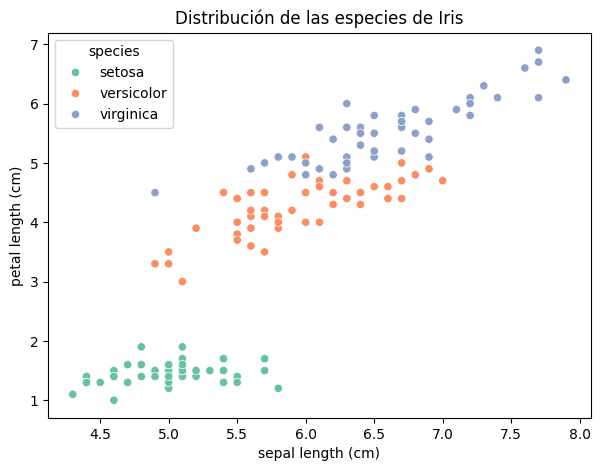

In [32]:
# Se carga el dataset iris en una tabla (dataframe) con pandas
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# Se determina la variable target (0, 1, 2) y otras tres especies (setosa, versicolor, virginica)
df['target'] = iris.target
df['species'] = df['target'].map({0:'setosa', 1:'versicolor', 2:'virginica'})

# Análisis estadístico de las 3 variables elegidas
print("Resumen:\n")
print(df.describe()) # Con .describe se muestran todas las caracteristicas estadísticas

# Con seaborn uso un scatterplot para ejemplificar con dos características (sepal y petal lenght)
plt.figure(figsize=(7,5))
sns.scatterplot(x=df['sepal length (cm)'], y=df['petal length (cm)'], hue=df['species'], palette='Set2')
plt.title('Distribución de las especies de Iris')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

## 1.4.2 Feature Engineering

Con la gráfica anterior se analizar y se seleccionan las variables más discriminantes para poder distinguir bien la especie.

- sepal length (cm)

- petal length (cm)

Donde en **X** se guardan las características que se usaran como entrada para predecir.

**Y** por otro lado se vuelve la variable target u objetivo y es lo que se quiere predecir.


In [33]:
X = df[['sepal length (cm)', 'petal length (cm)']]
y = df['target']

## 1.4.3 Prediction

In [34]:
# Separacion para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo KNN con k=5 (así que el algortimo visitará los 5 más cercanos)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Función para predecir en base a las dos caracterisitcas indicadas
def predict_species(sepal_length, petal_length):
    data = pd.DataFrame([[sepal_length, petal_length]], columns=['sepal length (cm)', 'petal length (cm)'])
    pred = knn.predict(data)[0]
    return iris.target_names[pred]

# Ejemplo de predicción
print("Predicción ejemplo 1:", predict_species(5.1, 1.8))
print("Predicción ejemplo 2:", predict_species(6.2, 4.8))
print("Predicción ejemplo 3:", predict_species(6.5, 4.5))

Predicción ejemplo 1: setosa
Predicción ejemplo 2: virginica
Predicción ejemplo 3: versicolor


## 1.4.4 Model Evaluation

Matriz de Confusión:
 [[19  0  0]
 [ 0 13  0]
 [ 0  1 12]]

Precisión del modelo (Accuracy): 0.978 



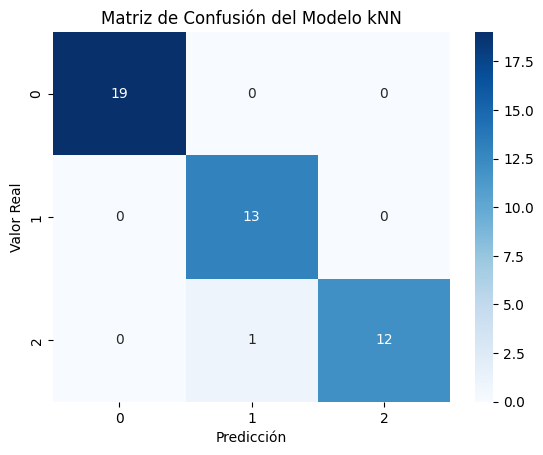

In [35]:
# Se hacen predicciones sobre el conjunto de prueba
y_pred = knn.predict(X_test)

# Matriz de Confusión
matriz = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:\n", matriz)

# Métrica Accuracy
acc = accuracy_score(y_test, y_pred)
print("\nPrecisión del modelo (Accuracy):", round(acc, 3),"\n")

# Matriz de confusión de manera visual
sns.heatmap(matriz, annot=True, cmap='Blues', fmt='g')
plt.title('Matriz de Confusión del Modelo kNN')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

Un resultado exitoso ya que al comparar las clases reales (filas) con las clases predichas (columnas) se lee de la siguiente manera:
De la clase 0 de las 19 especies que eran realmente setosa, el modelo predijo

*   De la clase 0, de las 19 flores que eran realmente setosa, el modelo predijo correctamente las 19.
*   De la clase 1, de las 13 flores que eran realmente versicolor, se predijo correctamente las 13.
*   De la clase 2, de las 13 flores que eran realmente virginica, el modelo predijo solamente 12 correctamente y se tuvo 1 error, por eso el cuadro blanco con el 1 dentro de la matriz.

# 1.5 Bibliografía

*   IBM. (2021, October 4). KNN. Ibm.com. https://www.ibm.com/mx-es/think/topics/knn
*   scikit-learn. (2019). sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.22.1 documentation. Scikit-Learn.org. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
*   Shafi, A. (2024, March 12). Clasificación K vecinos más próximos (KNN) con scikit-learn. Datacamp.com; DataCamp. https://www.datacamp.com/es/tutorial/k-nearest-neighbor-classification-scikit-learn
*   Tenhunen, W. (2025, June 29). KNN in Machine Learning (Project): From Concept to Classification with the Iris Dataset. Medium. https://medium.com/@williamtenhunen/knn-in-machine-learning-project-from-concept-to-classification-with-the-iris-dataset-f3fb99b350e3

